# BIGDATA ANALYSIS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,shutil
import statsmodels.api as sm
from datetime import datetime
from sklearn.kernel_ridge import KernelRidge
from IPython.core import display as ICD

In [5]:
dataset=pd.read_csv("Dataset/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
dataset.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
dataset.shape

(180519, 53)

In [7]:
dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)

In [8]:
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)

In [9]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)

<AxesSubplot:>

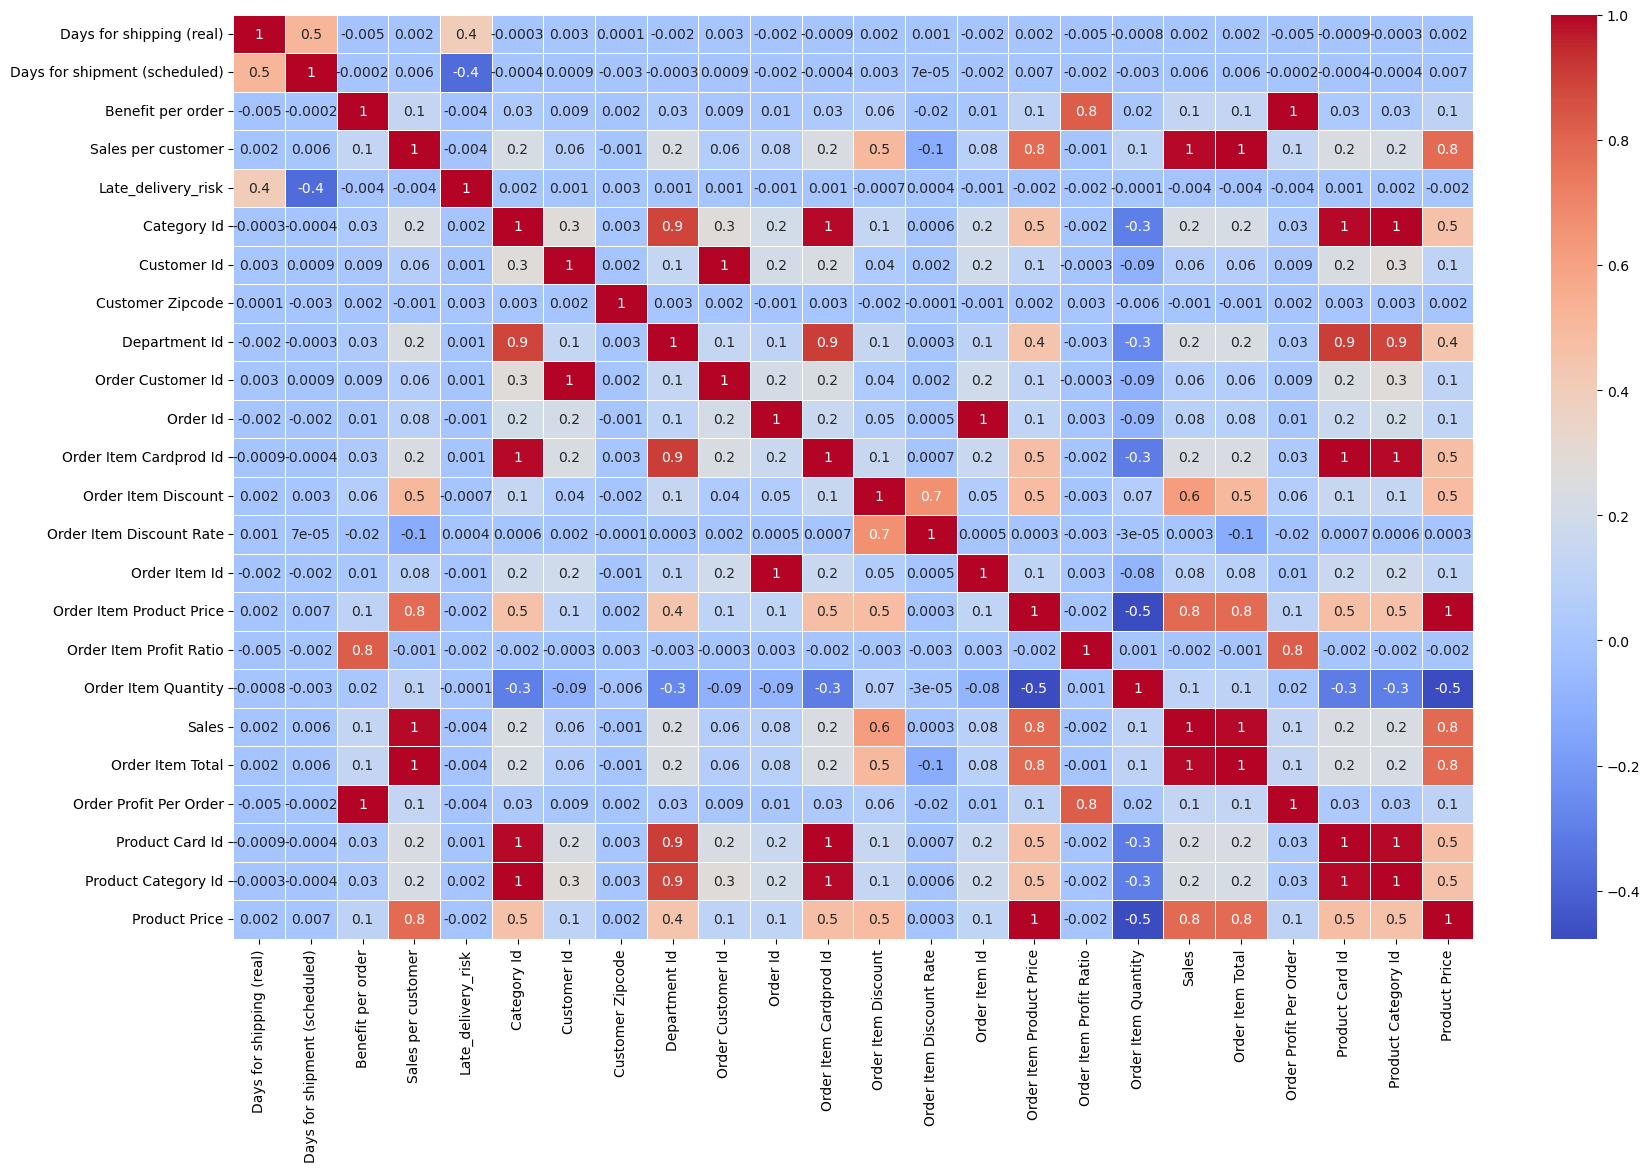

In [10]:
fig, ax = plt.subplots(figsize=(20,12))         # figsize
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

# SALES ANALYSIS

<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

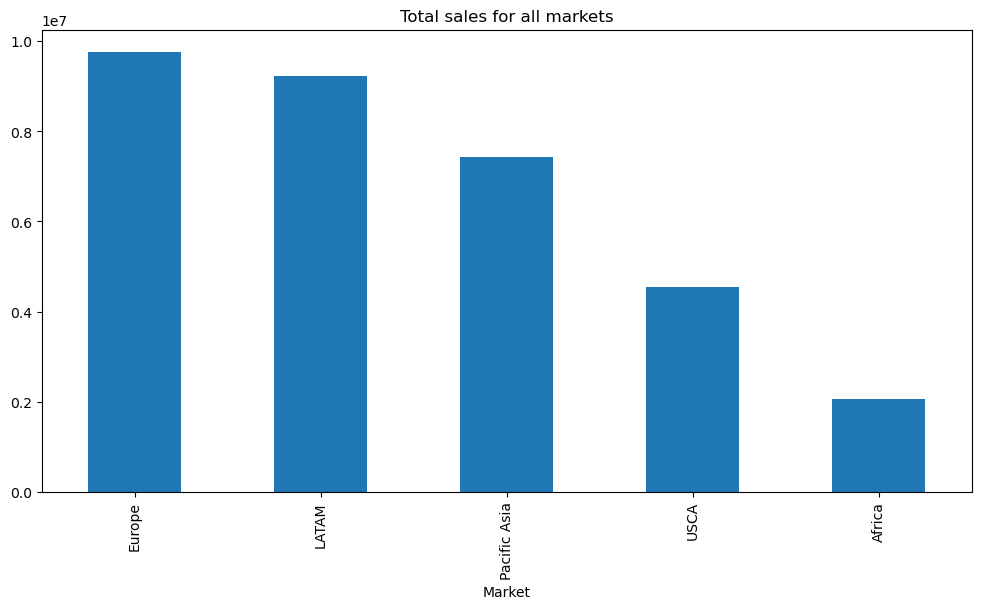

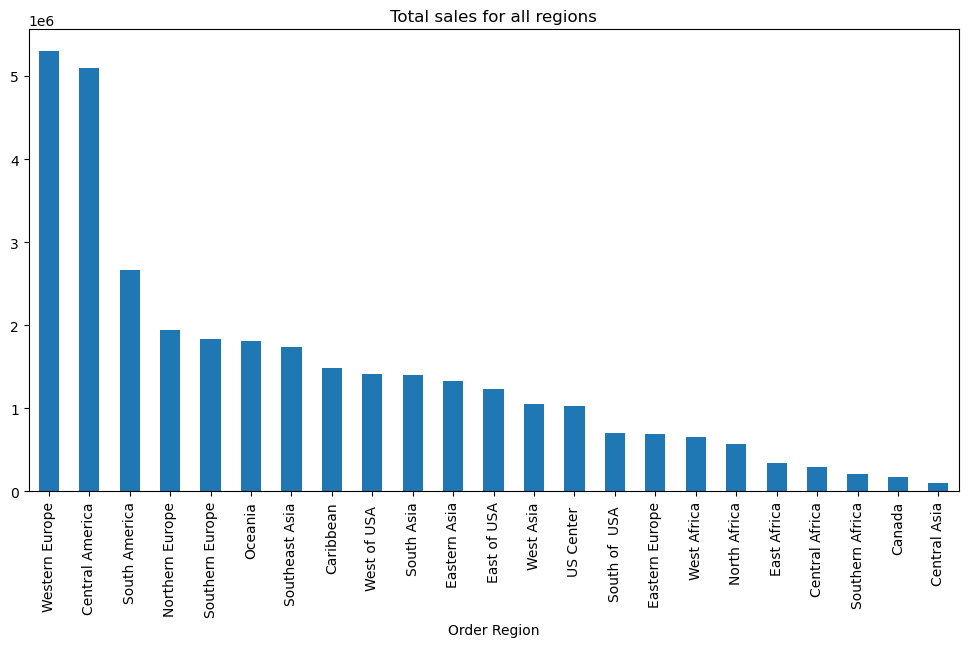

In [11]:
market = data.groupby('Market') 
region = data.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

<AxesSubplot:title={'center':'Average price'}, xlabel='Category Name'>

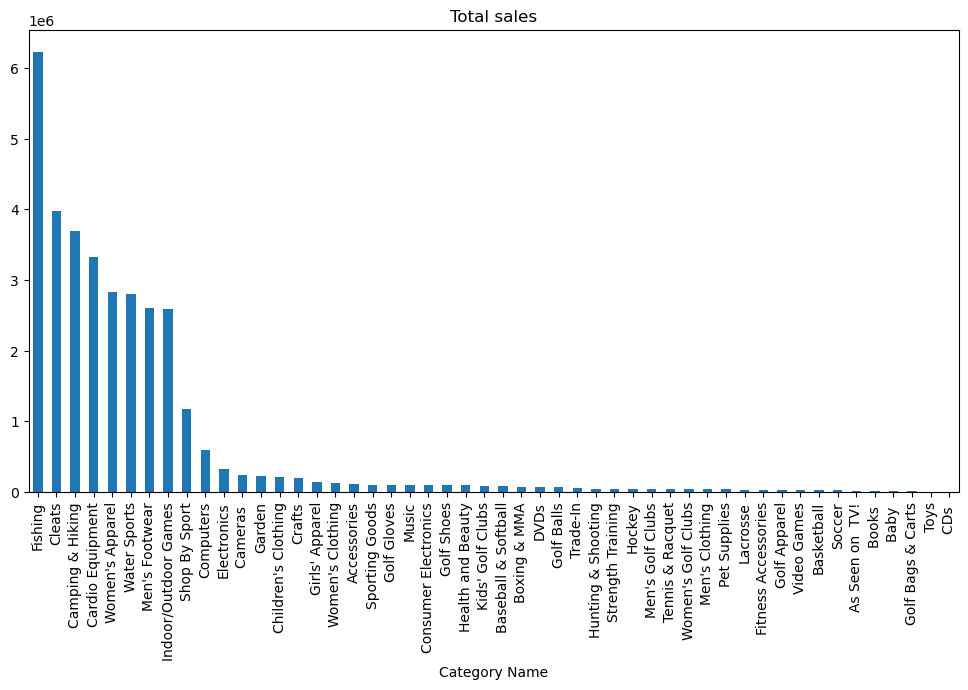

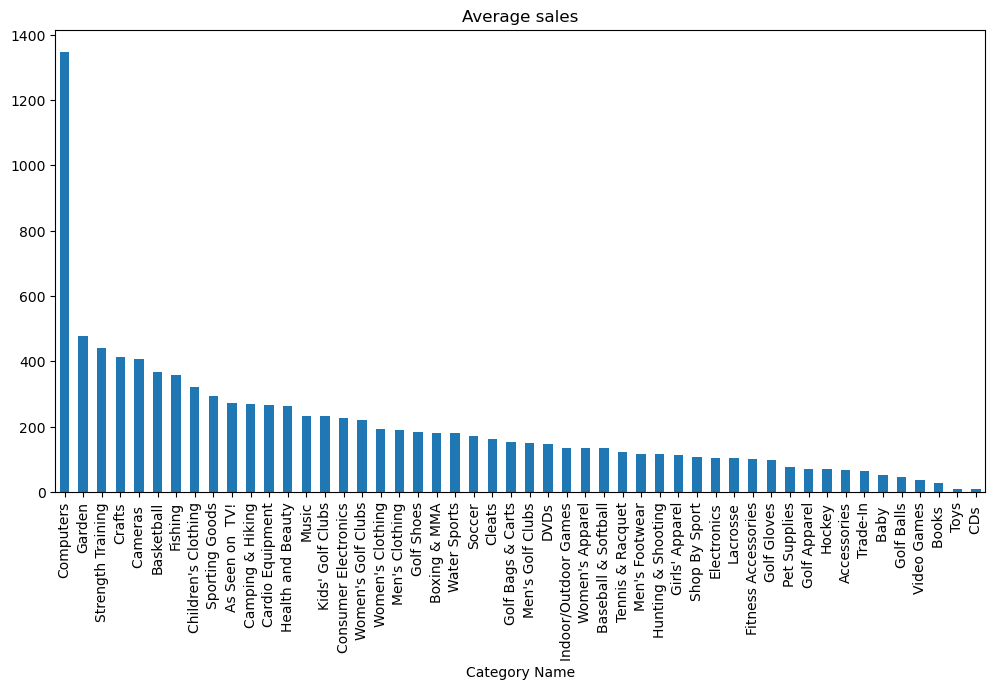

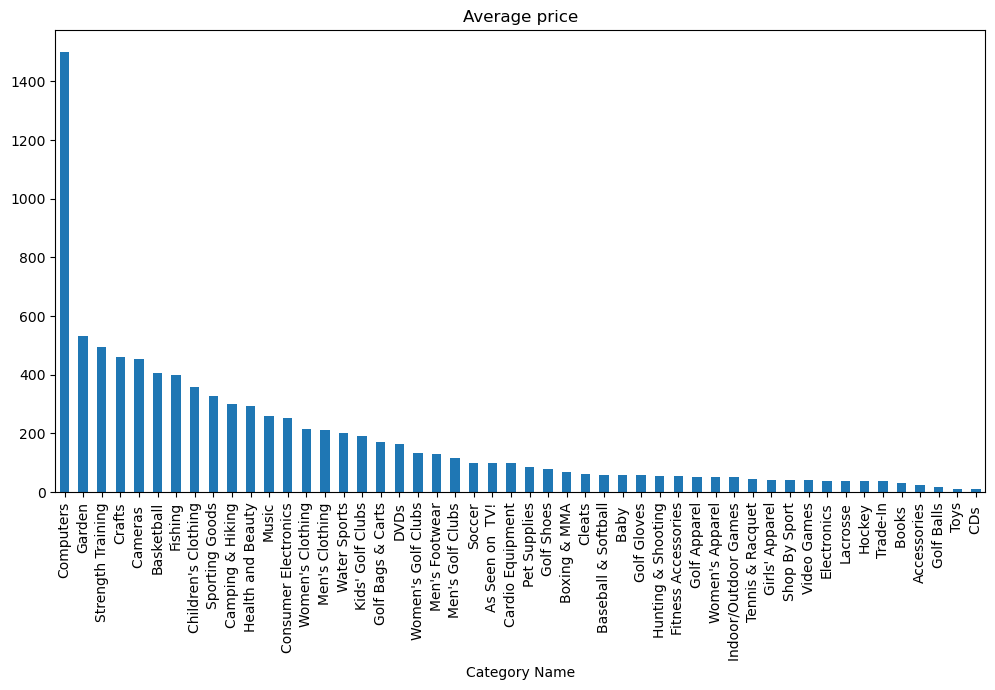

In [12]:

cat = data.groupby('Category Name')
plt.figure(1)

cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")

plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)

cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

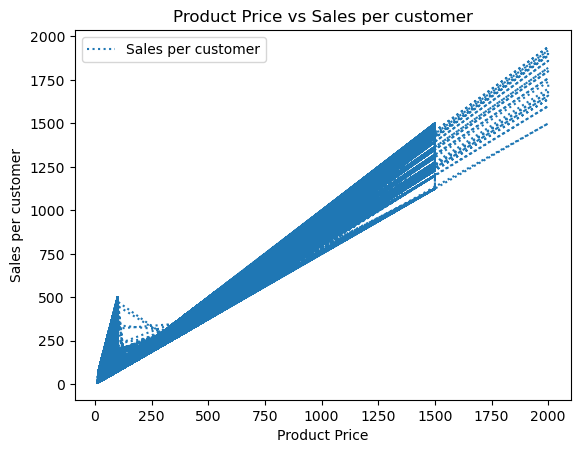

In [13]:
data.plot(x='Product Price', y='Sales per customer',linestyle='dotted',markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')
plt.xlabel('Product Price')  
plt.ylabel('Sales per customer') 
plt.show()

In [14]:
data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

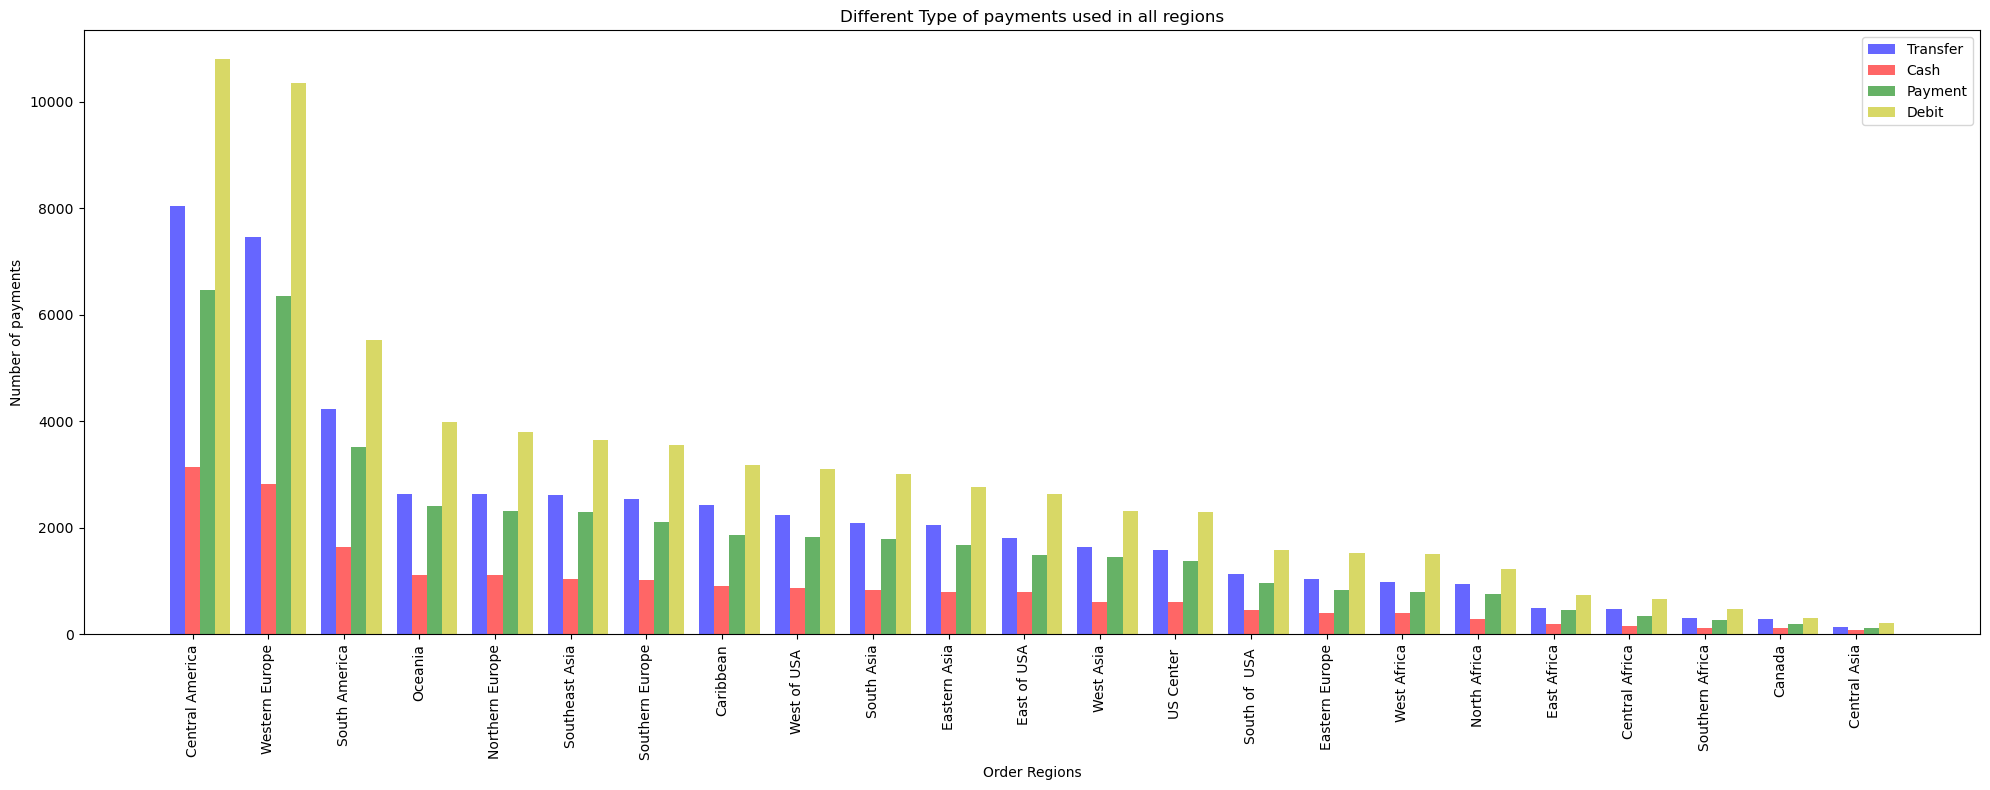

In [15]:
xyz1 = data[(data['Type'] == 'TRANSFER')]
xyz2= data[(data['Type'] == 'CASH')]
xyz3= data[(data['Type'] == 'PAYMENT')]
xyz4= data[(data['Type'] == 'DEBIT')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

Total revenue lost with orders -3883547.345768667


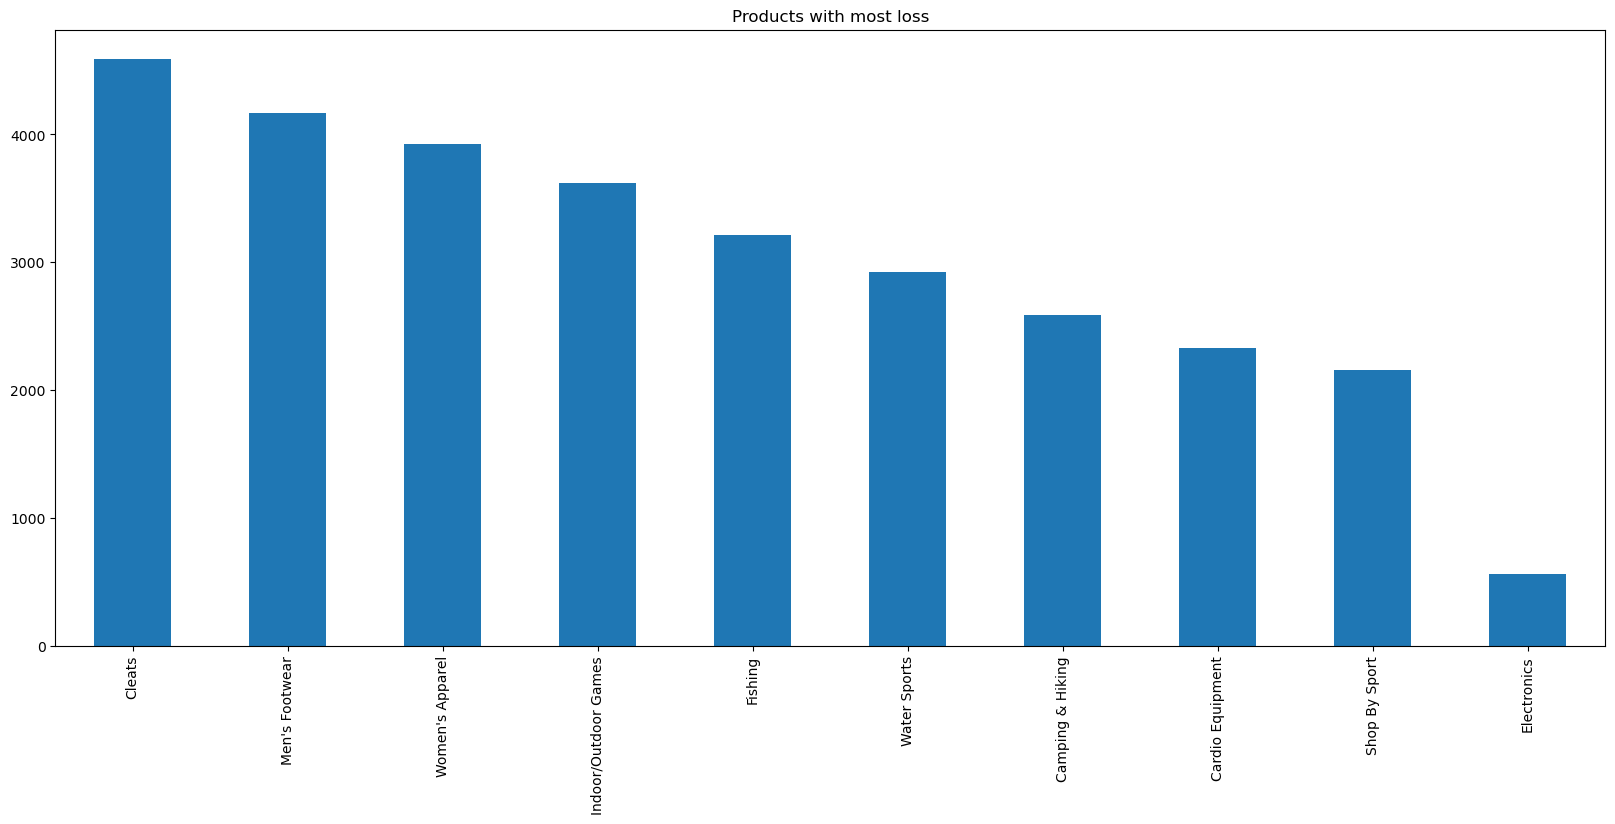

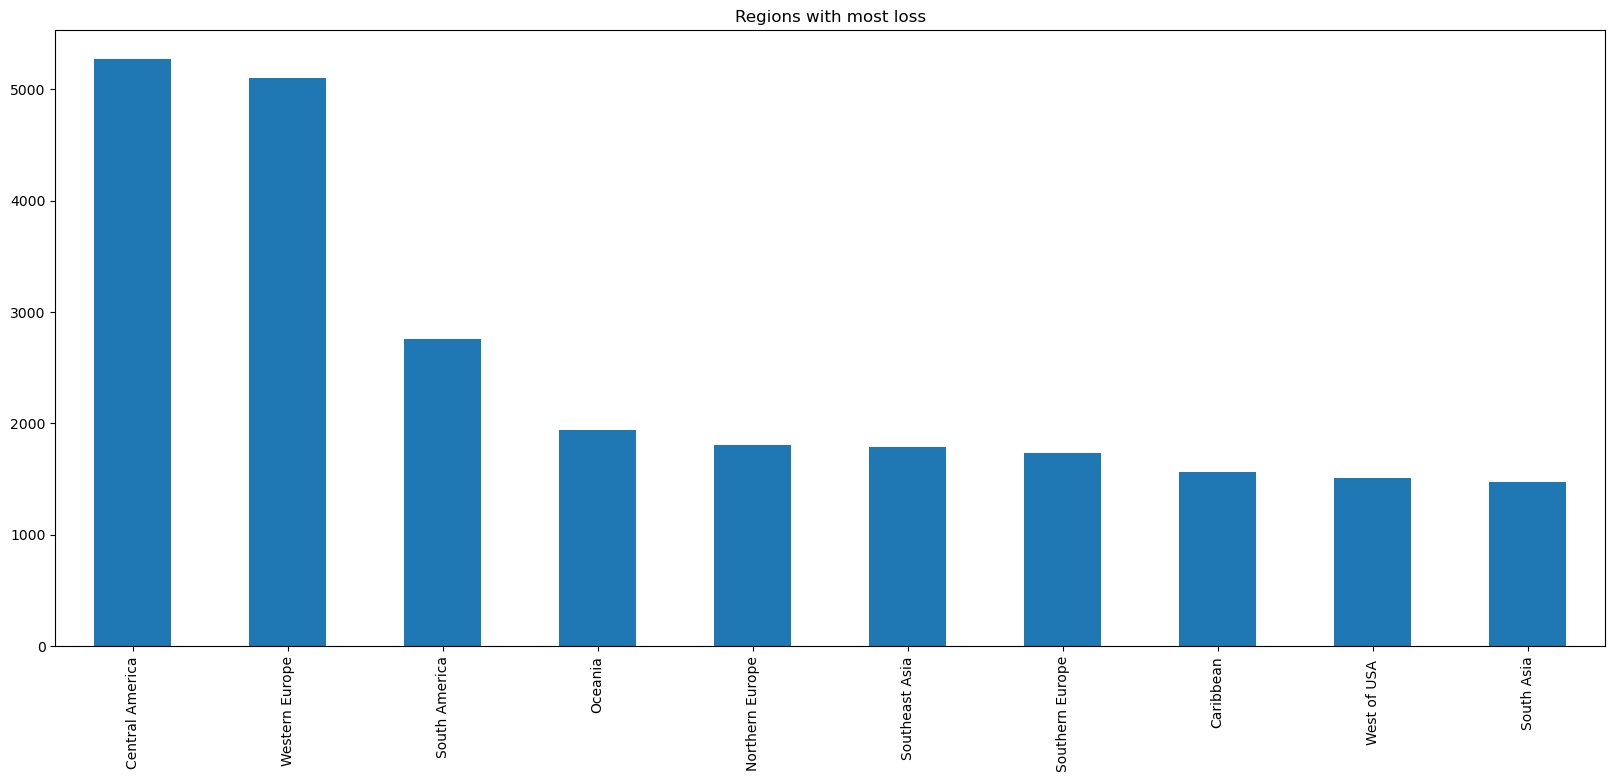

In [16]:
loss = data[(data['Benefit per order']<0)]

plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")

print('Total revenue lost with orders',loss['Benefit per order'].sum())

In [17]:

xyz = data[(data['Type'] != 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

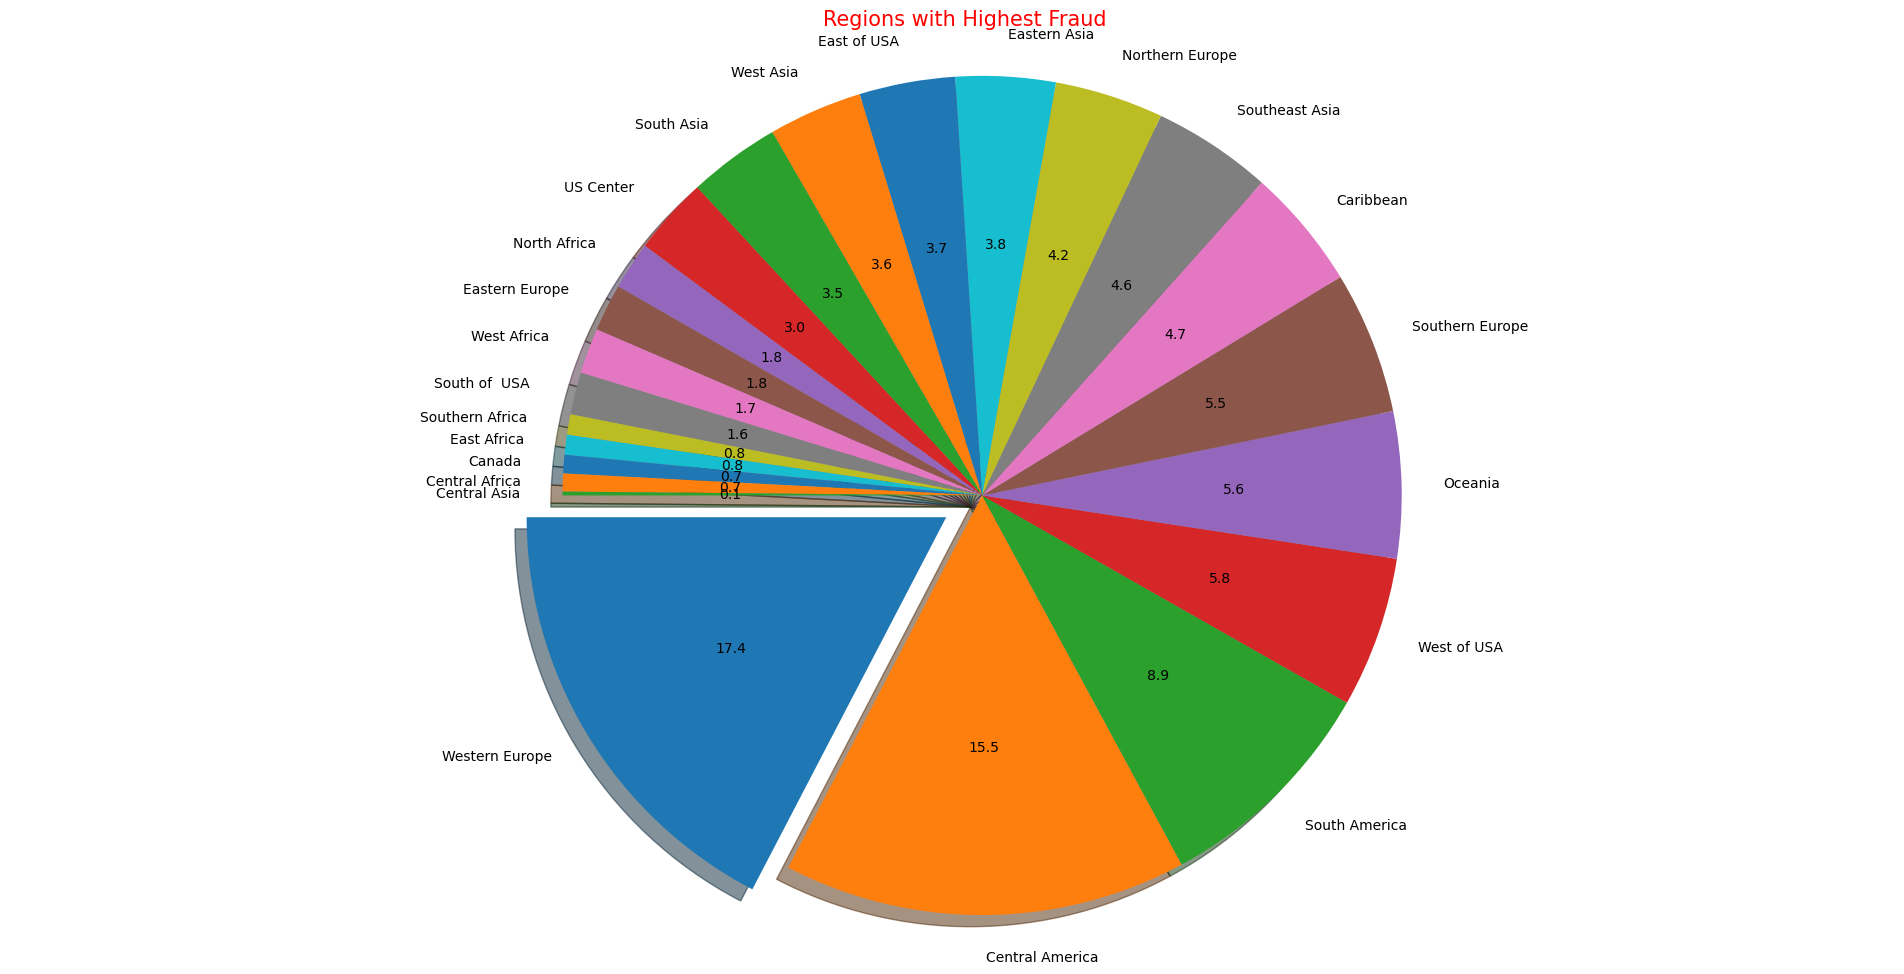

In [18]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='r') 
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

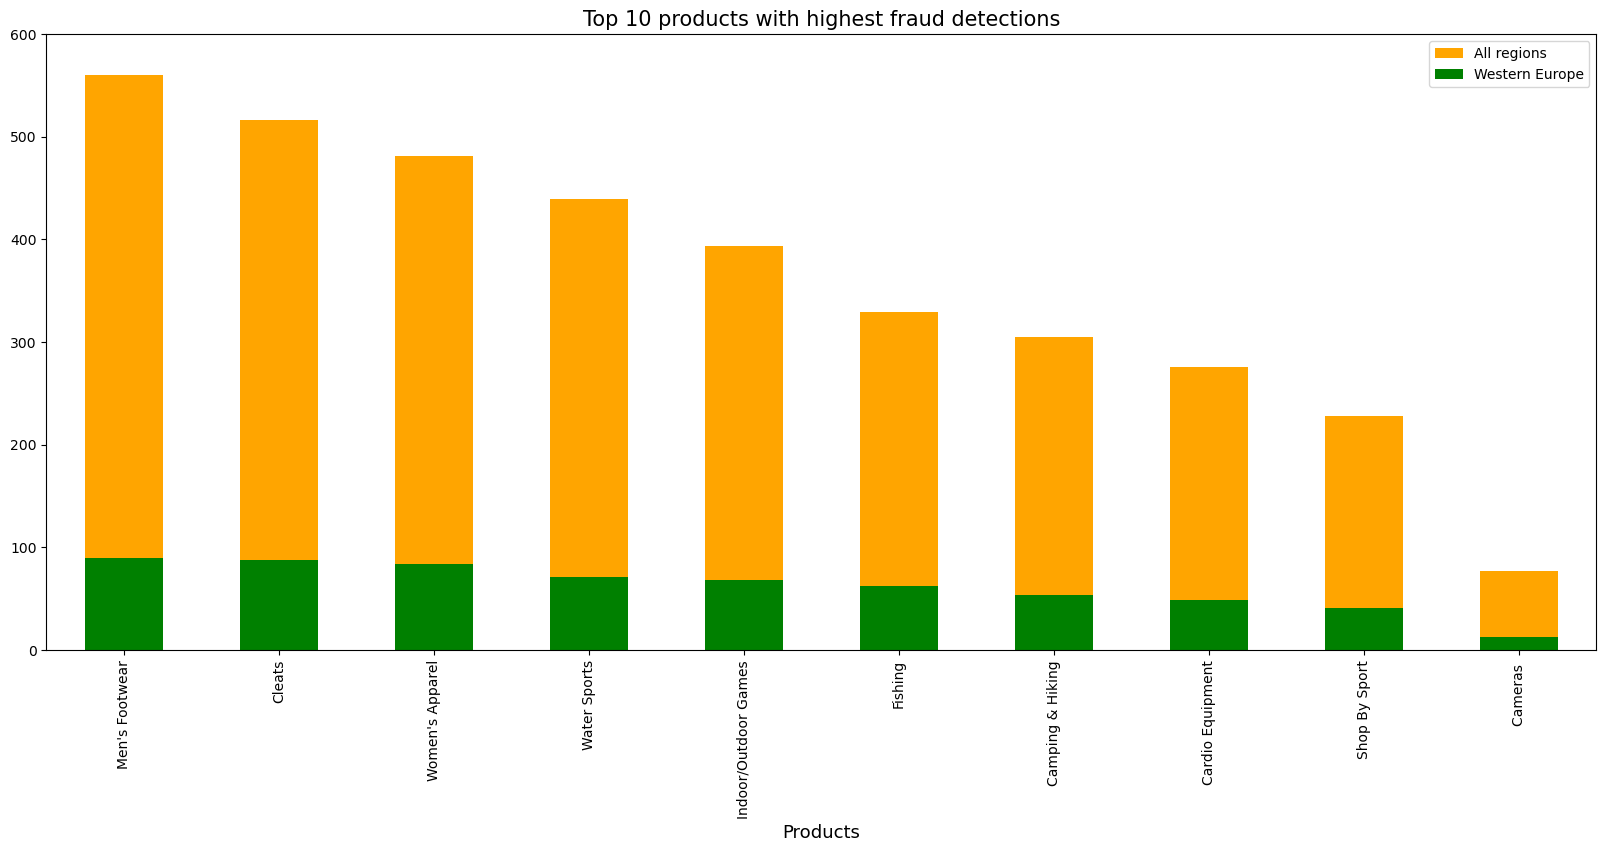

In [19]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]

fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')

fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()


<AxesSubplot:title={'center':'Top 10 Highest Fraud Customers'}>

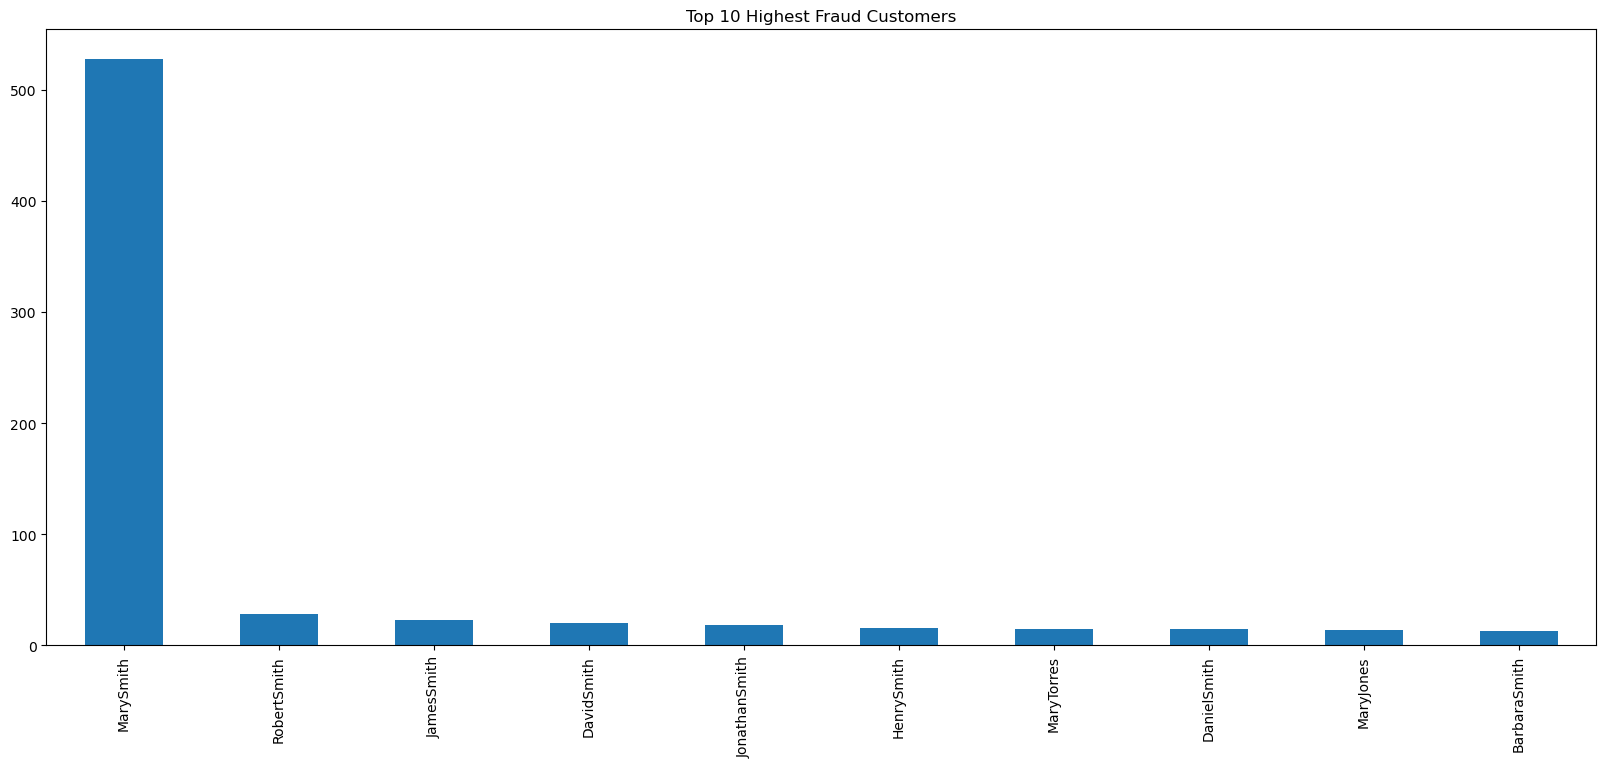

In [20]:

cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 

cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

In [21]:

amount = data[(data['Customer Full Name'] == 'MarySmith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]

amount['Sales'].sum()

102491.66191043999

<AxesSubplot:title={'center':'Top 10 products with most late deliveries'}>

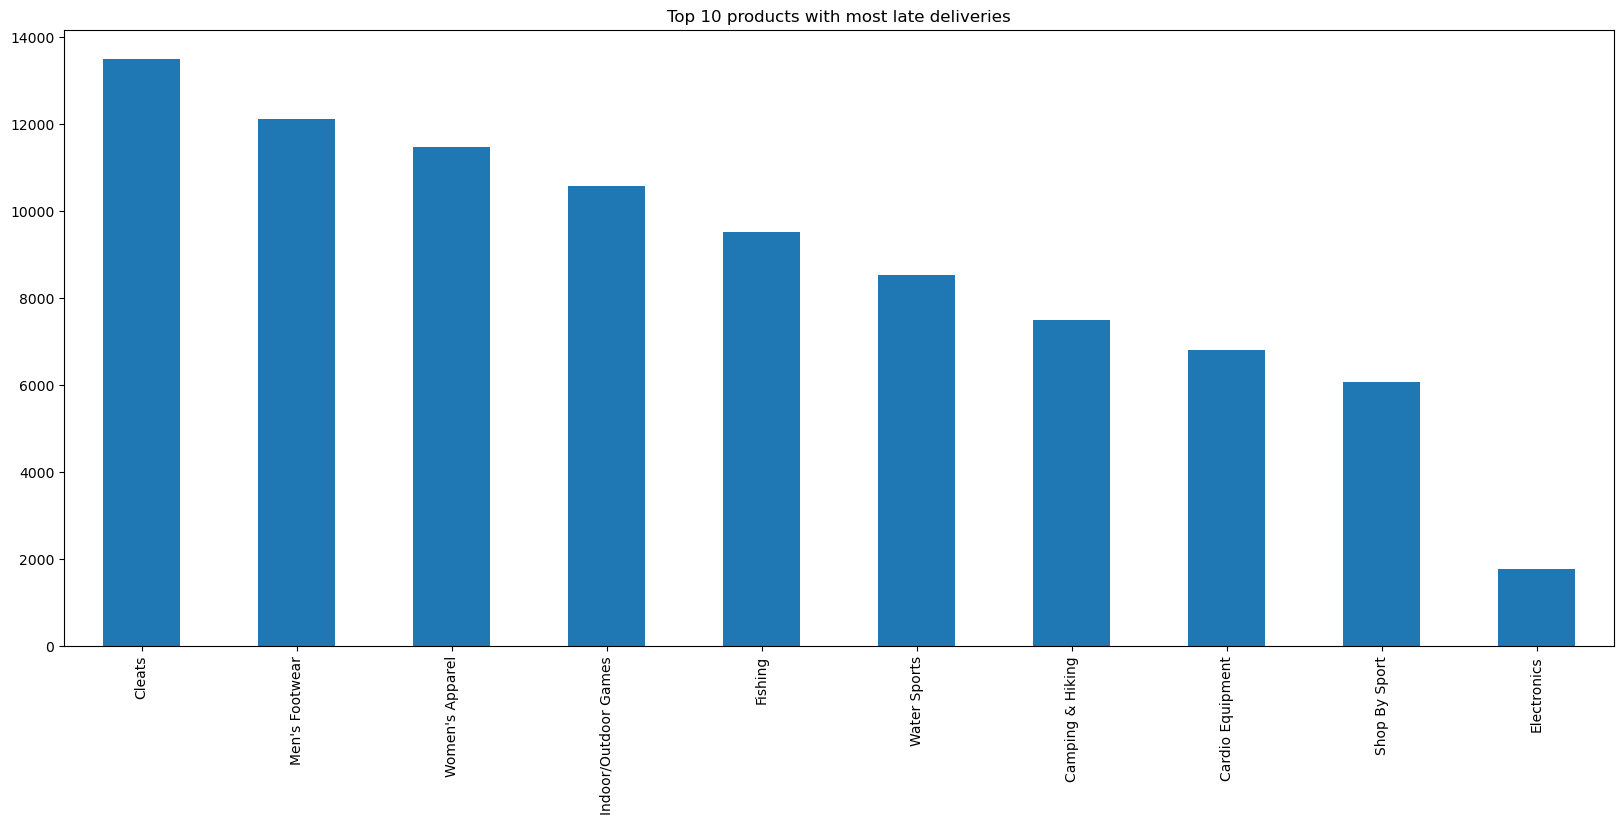

In [22]:

late_delivery = data[(data['Delivery Status'] == 'Late delivery')]

late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

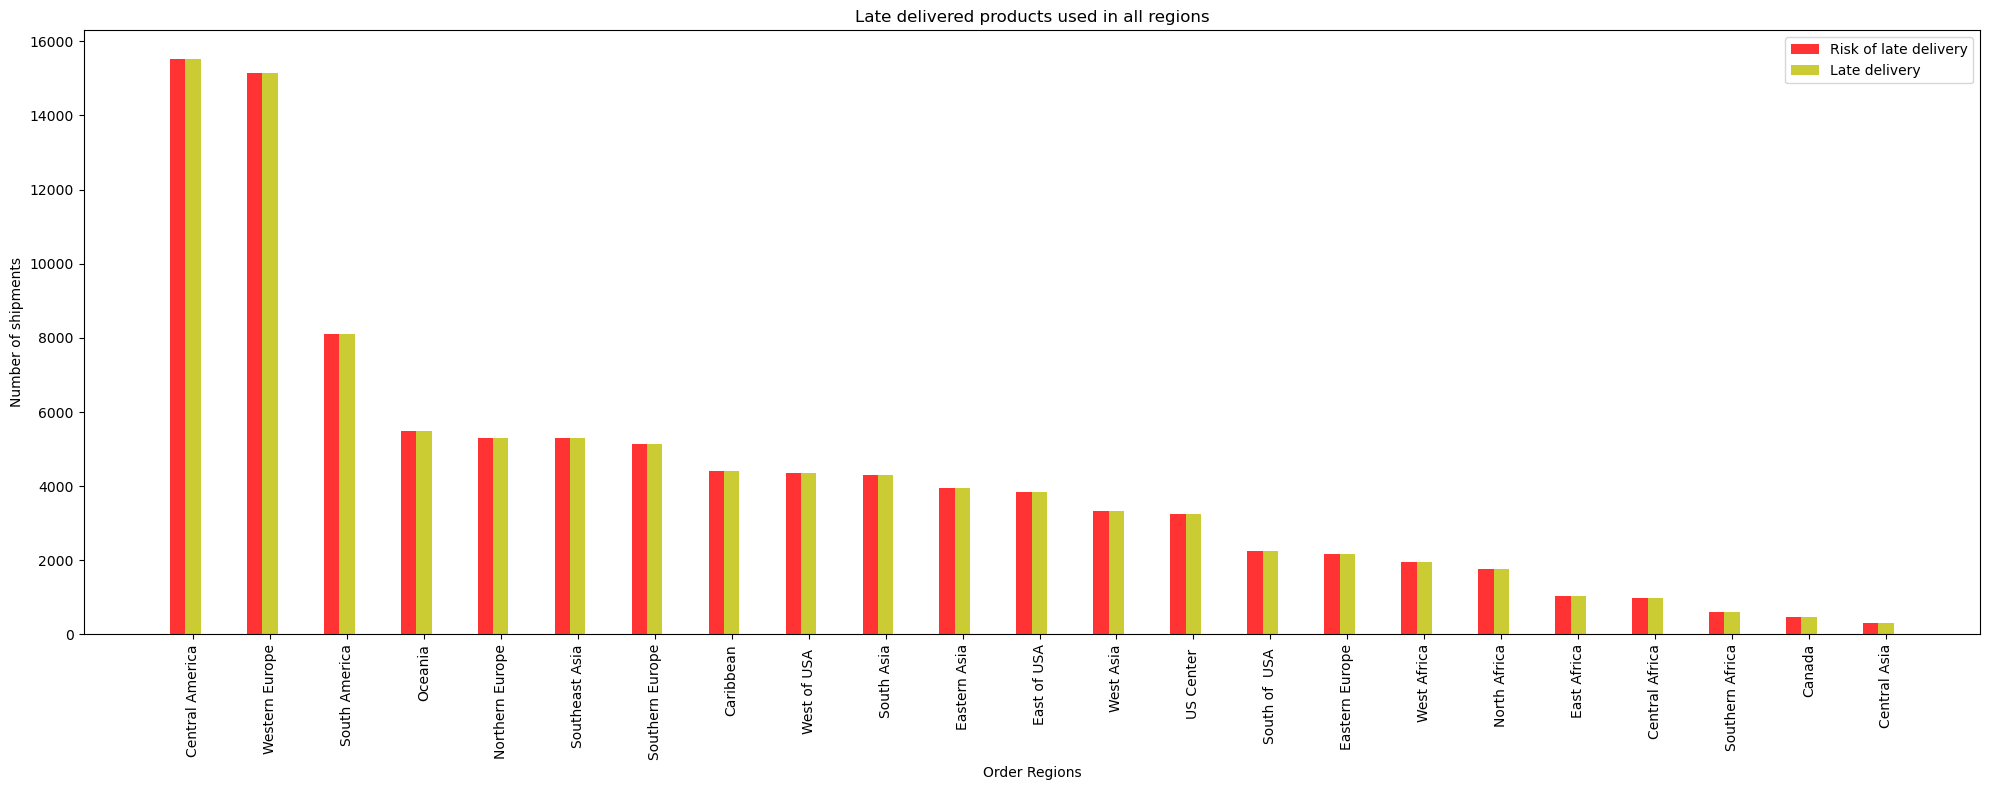

In [22]:

xyz1 = data[(data['Late_delivery_risk'] == 1)]

xyz2 = data[(data['Delivery Status'] == 'Late delivery')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()

names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8)) #Figure size
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

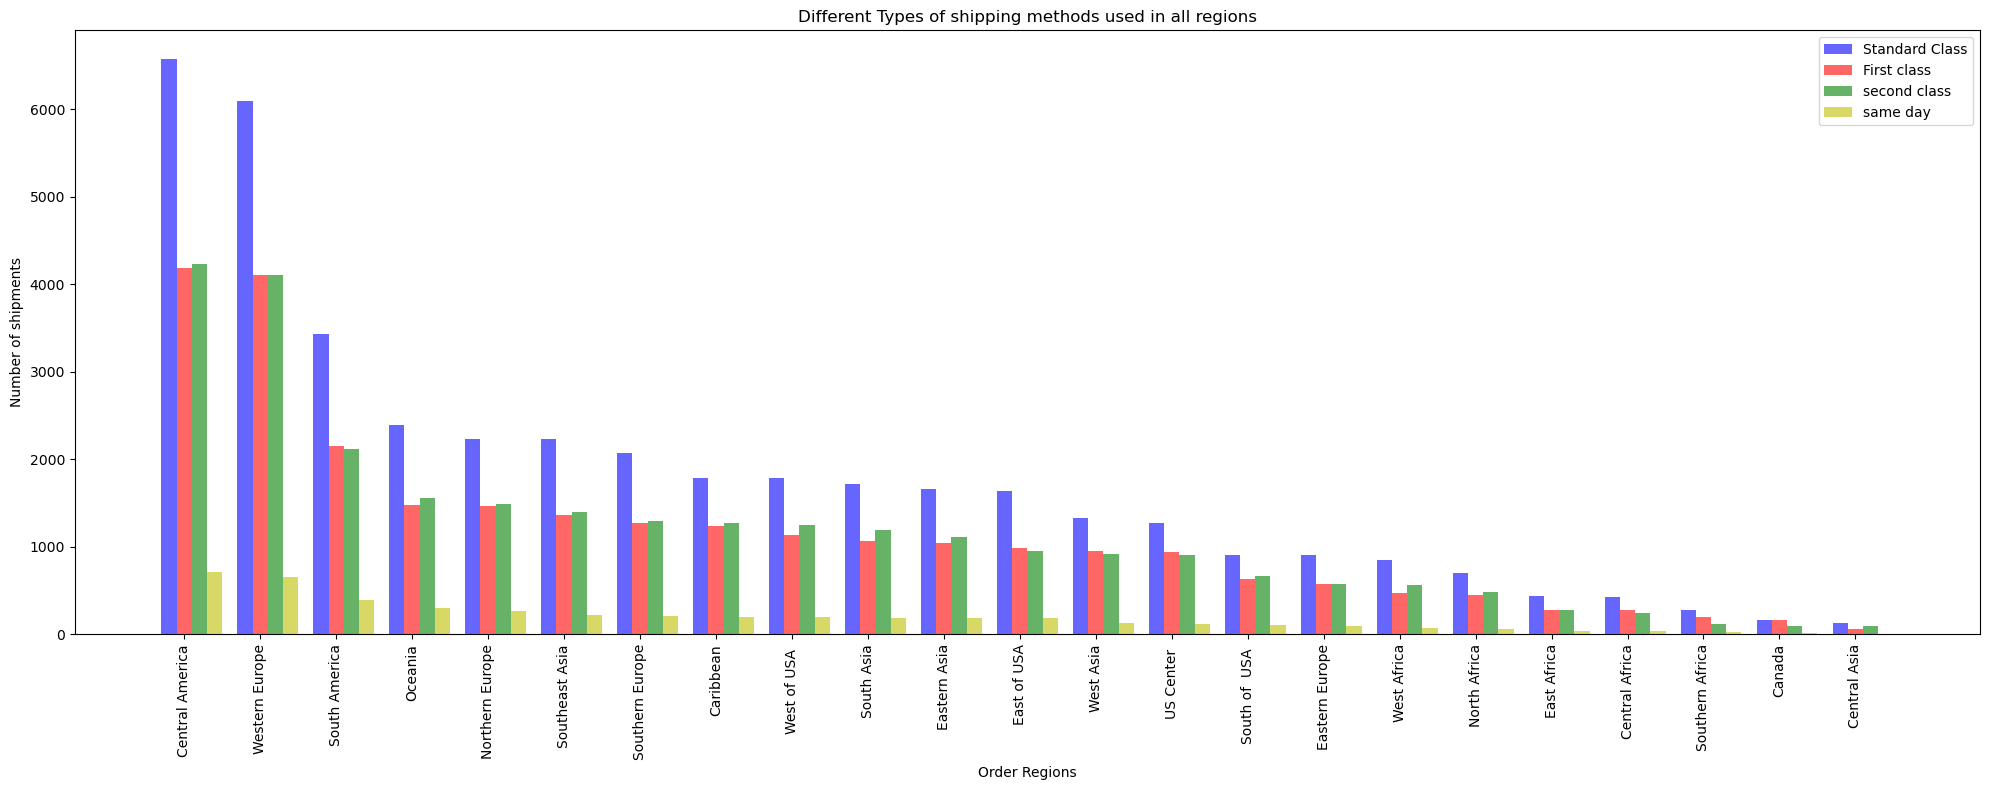

In [23]:

xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]

xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]

xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]

xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]

count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()

names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

# CUSTOMER SEGMENTATION

In [24]:
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']

In [25]:
present = dt.datetime(2017,9,9)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [26]:
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [27]:
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,647,1,2362.250061
2,-9,10,2842.700073
3,84,18,6143.760057
4,235,14,4370.629991
5,312,7,2993.790032


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

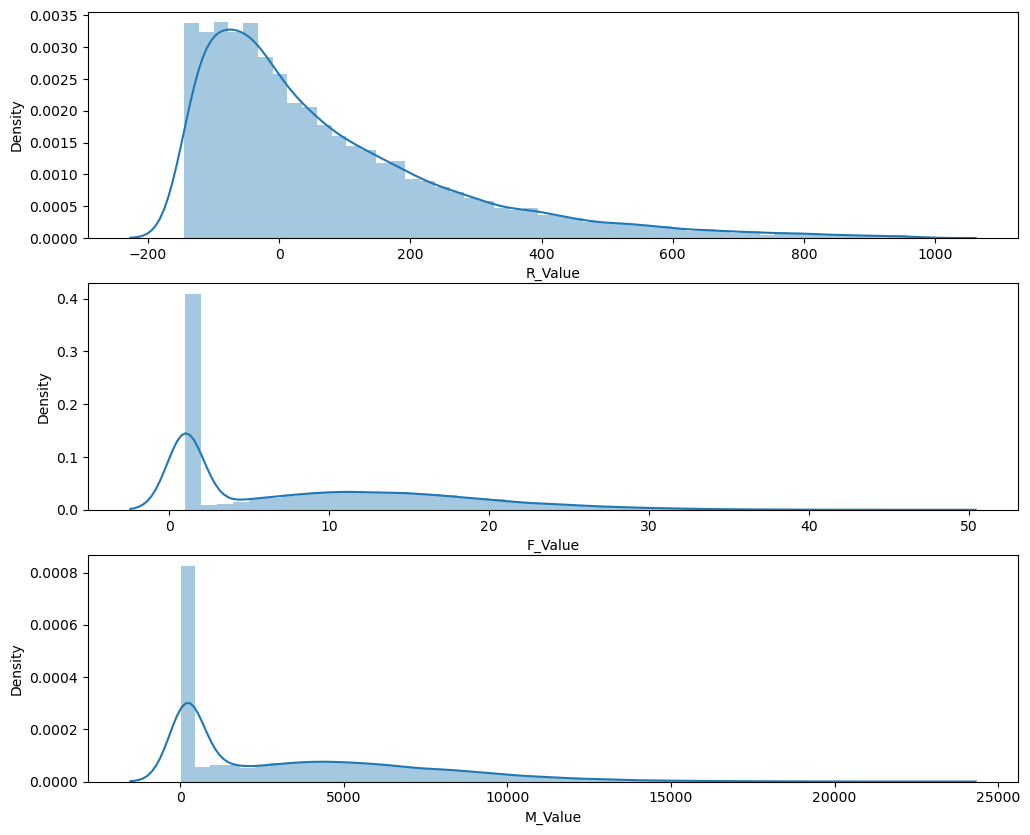

In [28]:
plt.figure(figsize=(12,10)) 
plt.subplot(3, 1, 1)
sns.distplot(Customer_seg['R_Value'])
plt.subplot(3, 1, 2) 
sns.distplot(Customer_seg['F_Value'])
plt.subplot(3, 1, 3)
sns.distplot(Customer_seg['M_Value'])
plt.show()

In [29]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) 
quantiles = quantiles.to_dict() 

In [30]:

def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
  
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [31]:

Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))

Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))

Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,647,1,2362.250061,4,4,3
2,-9,10,2842.700073,2,2,2
3,84,18,6143.760057,3,1,1
4,235,14,4370.629991,4,2,2
5,312,7,2993.790032,4,3,2


In [32]:
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,647,1,2362.250061,4,4,3,443
2,-9,10,2842.700073,2,2,2,222
3,84,18,6143.760057,3,1,1,311
4,235,14,4370.629991,4,2,2,422
5,312,7,2993.790032,4,3,2,432


In [33]:
count=Customer_seg['RFM_Score'].unique()
print(count)
len(count)

['443' '222' '311' '422' '432' '421' '211' '322' '434' '212' '411' '331'
 '412' '433' '321' '423' '333' '312' '221' '223' '332' '233' '232' '323'
 '444' '431' '343' '243' '344' '334' '244' '143' '144']


33

In [34]:
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10, 12], dtype=int64)

In [35]:
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): 
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): 
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): 
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): 
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): 
        return 'At Risk'
    else:                              
        
        return 'Lost'

Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)

Customer_seg.head()


,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,647,1,2362.250061,4,4,3,443,11,Champions
2,-9,10,2842.700073,2,2,2,222,6,Cant lose them
3,84,18,6143.760057,3,1,1,311,5,At Risk
4,235,14,4370.629991,4,2,2,422,8,Promising
5,312,7,2993.790032,4,3,2,432,9,Recent Customers


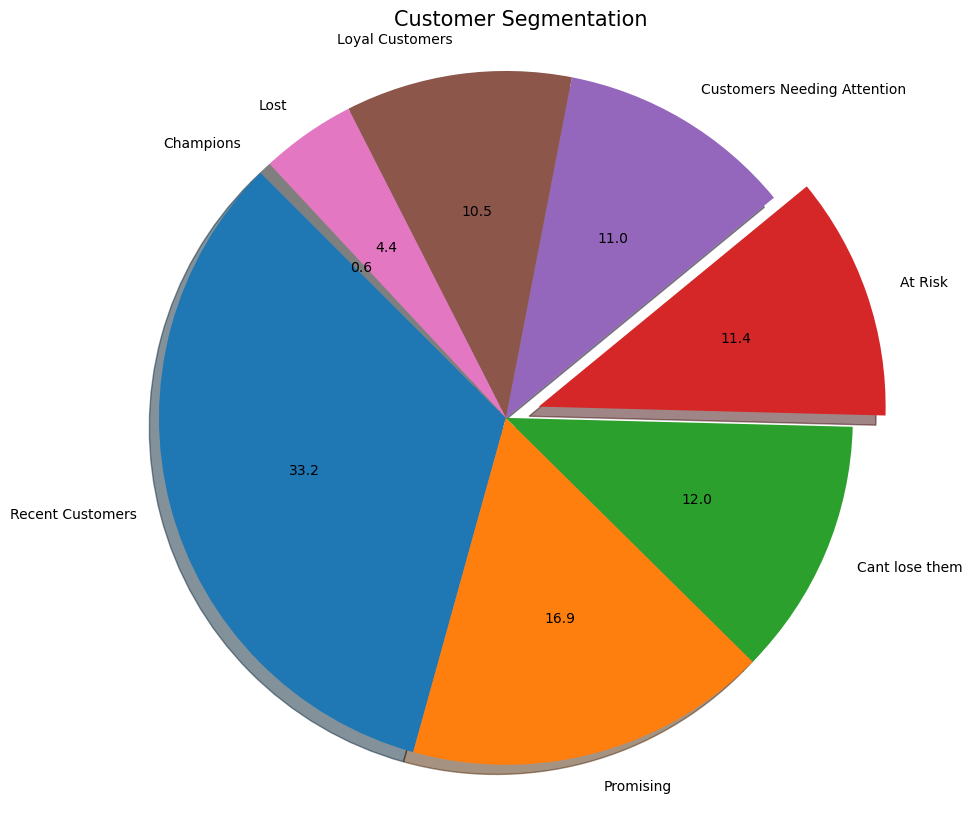

In [36]:
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=135, explode=(0,0,0,0.1,0,0,0,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

In [37]:
churned=Customer_seg[(Customer_seg['RFM_Score']=='411')].sort_values('M_Value', ascending=False).head(10)
churned

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
11065,164,41,18641.300091,4,1,1,411,6,Cant lose them
6285,187,37,18287.010097,4,1,1,411,6,Cant lose them
7892,247,29,17620.470196,4,1,1,411,6,Cant lose them
2893,167,24,17536.609842,4,1,1,411,6,Cant lose them
4181,280,29,17333.960094,4,1,1,411,6,Cant lose them
4781,357,31,17048.380088,4,1,1,411,6,Cant lose them
9271,199,35,17044.910217,4,1,1,411,6,Cant lose them
4659,272,27,16973.060024,4,1,1,411,6,Cant lose them
1695,181,33,16916.020176,4,1,1,411,6,Cant lose them


In [38]:
Customer_seg[(Customer_seg['RFM_Score']=='144')|(Customer_seg['RFM_Score']=='143')].sort_values('M_Value', ascending=False).head(10)

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
18101,-107,1,1500.0,1,4,3,143,8,Promising
18083,-106,1,1500.0,1,4,3,143,8,Promising
18047,-106,1,1500.0,1,4,3,143,8,Promising
18065,-106,1,1500.0,1,4,3,143,8,Promising
18119,-107,1,1500.0,1,4,3,143,8,Promising
18046,-106,1,1485.0,1,4,3,143,8,Promising
18100,-107,1,1485.0,1,4,3,143,8,Promising
18118,-107,1,1485.0,1,4,3,143,8,Promising
18064,-106,1,1485.0,1,4,3,143,8,Promising
